### Pet Classification Model Using CNN

##### Project Objective:

Build a CNN model that classifies the given pet images correctly into dog and cat images. 
The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping. 

##### Project Description and Scope: 

You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.
You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data. 

##### Project Guidelines:

Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers: 
● Input layer 
● Convolutional layer 1 with 32 filters of kernel size[5,5] 
● Pooling layer 1 with pool size[2,2] and stride 2 
● Convolutional layer 2 with 64 filters of kernel size[5,5] 
● Pooling layer 2 with pool size[2,2] and stride 2 
● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
● Dropout layer with dropout probability 0.4 
Predict the class by doing a softmax on the output of the dropout layers. 
This should be followed by training and evaluation: 
● For the training step, define the loss function and minimize it 
● For the evaluation step, calculate the accuracy 
Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data. 

##### Prerequisites:

To execute this project, please ensure you have the latest version of TensorFlow installed on your system.


In [39]:
#import require labraries 

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers

2024-01-14 14:31:27.507216: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-14 14:31:27.546731: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-14 14:31:29.661062: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


In [3]:
tf.random.set_seed(12345)

In [4]:
#dataGen = ImageDataGenerator(rescale = 1./255,
#                                   shear_range = 0.2,
#                                   zoom_range = 0.2,
#                                   #validation_split = 0.2,
#                                   horizontal_flip = True)

dataGen = ImageDataGenerator(
            rotation_range=10,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            rescale=1./255,
            horizontal_flip=True,
            vertical_flip=True,
            validation_split=0.25,
            fill_mode='nearest')

dataGen = ImageDataGenerator(rescale=1./255)

In [5]:
#import training data from file 

In [6]:
training_set = dataGen.flow_from_directory('../DL/dataset/train', target_size = (150, 150),
                                                 batch_size = 8,
                                                 #subset='training',
                                                 class_mode = 'binary')

Found 40 images belonging to 3 classes.


In [7]:
#import test data from file 

In [8]:
validation_set = dataGen.flow_from_directory('../DL/dataset/test', target_size = (150, 150),
                                                 batch_size = 8,
                                                 #subset='validation',
                                                 class_mode = 'binary')

Found 20 images belonging to 3 classes.


In [9]:
training_set.class_indices, validation_set.class_indices

({'.ipynb_checkpoints': 0, 'cats': 1, 'dogs': 2},
 {'.ipynb_checkpoints': 0, 'cats': 1, 'dogs': 2})

In [10]:
#build model according to 
#Input layer ● Convolutional layer 1 with 32 filters of kernel size[5,5] 
#Pooling layer 1 with pool size[2,2] and stride
#Convolutional layer 2 with 64 filters of kernel size[5,5]
#Pooling layer 2 with pool size[2,2] and stride 2
#Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
#Dropout layer with dropout probability 0.4 Predict the class by doing a softmax on the output of the dropout layers. This should be followed by training and evaluation: 
#

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten, Dense

In [12]:
model = models.Sequential()

In [13]:
# Add the first Convolution layer and max pool layer
model.add(Conv2D(name='cnv_layer',
                 filters=32,
                 kernel_size=3,
                 activation='relu',
                 padding='same',
                 input_shape=[150, 150, 3]))

In [14]:
model.add(MaxPool2D(pool_size = 2)) # Maxpool Layer

In [15]:
model.add(Flatten(name='flatten')) # Add the flatten layer

In [16]:
model.add(Dense(units = 64,
                name='dense1',
                activation = 'relu')) #Add the dense layer

In [17]:
model.add(Dense(units = 32,
                name='dense2',
                activation = 'relu')) #Add the dense layer

In [18]:
model.add(Dense(name='output',
                units=1,
                activation = 'sigmoid')) # Final Output layer

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnv_layer (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 180000)            0         
                                                                 
 dense1 (Dense)              (None, 64)                11520064  
                                                                 
 dense2 (Dense)              (None, 32)                2080      
                                                                 
 output (Dense)              (None, 1)                 33        
                                                        

In [20]:

# Compile the model
mh = model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [21]:

mh = model.fit(training_set,
          validation_data = validation_set,
          epochs=30) # Train the model for 3 epochs

Epoch 1/30
5/5 [==============================] - 1s 181ms/step - loss: -31.7444 - accuracy: 0.4250 - val_loss: -99.0691 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 1s 156ms/step - loss: -177.7237 - accuracy: 0.5000 - val_loss: -304.8374 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 1s 142ms/step - loss: -473.0379 - accuracy: 0.5000 - val_loss: -684.2023 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 1s 144ms/step - loss: -996.4509 - accuracy: 0.5000 - val_loss: -1357.6658 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 1s 143ms/step - loss: -1834.8265 - accuracy: 0.5000 - val_loss: -2547.9604 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 1s 144ms/step - loss: -3398.0649 - accuracy: 0.5000 - val_loss: -4403.9443 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 1s 146ms/step - loss: -5518.8560 - accuracy: 0.5000 - val_loss: -7247.6

In [22]:
#For the training step, define the loss function and minimize it

In [23]:

#sgd_opt = tf.keras.optimizers.SGD(lr = 0.001)

In [24]:
#compiling model 

In [25]:
#history=model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics =  ['accuracy'])

In [26]:
#model train for 100 epochs 
#model.summary()

In [27]:
#history = model.fit(train, validation_data = test, epochs =3)

In [28]:
test_loss, test_accuracy = model.evaluate(validation_set)

3/3 [==============================] - 0s 16ms/step - loss: -2331053.0000 - accuracy: 0.5000


In [29]:
test_loss

-2331053.0

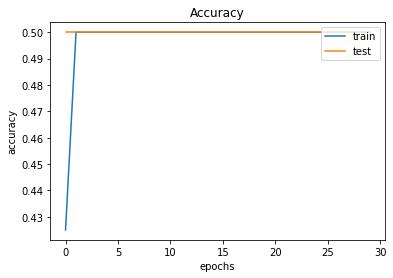

In [30]:
from matplotlib import pyplot as plt 

plt.plot(mh.history['accuracy'])
plt.plot(mh.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [31]:
mh =model.fit(training_set, validation_data = validation_set, epochs =20)

Epoch 1/20
5/5 [==============================] - 1s 153ms/step - loss: -2536380.5000 - accuracy: 0.5000 - val_loss: -2681949.5000 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 1s 153ms/step - loss: -2909174.0000 - accuracy: 0.5000 - val_loss: -3073283.5000 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 1s 153ms/step - loss: -3310094.0000 - accuracy: 0.5000 - val_loss: -3514374.7500 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 1s 149ms/step - loss: -3848275.2500 - accuracy: 0.5000 - val_loss: -3973007.2500 - val_accuracy: 0.5000
Epoch 5/20
5/5 [==============================] - 1s 147ms/step - loss: -4310928.0000 - accuracy: 0.5000 - val_loss: -4507865.0000 - val_accuracy: 0.5000
Epoch 6/20
5/5 [==============================] - 1s 150ms/step - loss: -4888394.0000 - accuracy: 0.5000 - val_loss: -5100301.0000 - val_accuracy: 0.5000
Epoch 7/20
5/5 [==============================] - 1s 150ms/step - loss: -555

In [32]:
test_loss, test_accuracy = model.evaluate(validation_set)

3/3 [==============================] - 0s 17ms/step - loss: -21823676.0000 - accuracy: 0.5000


In [33]:
test_loss

-21823676.0

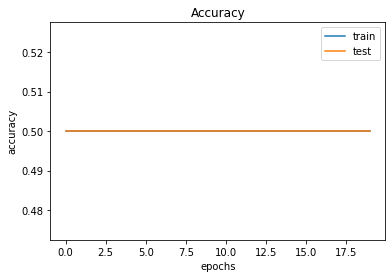

In [34]:
from matplotlib import pyplot as plt 

plt.plot(mh.history['accuracy'])
plt.plot(mh.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [35]:
mh =model.fit(training_set, validation_data = validation_set, epochs =30)

Epoch 1/30
5/5 [==============================] - 1s 154ms/step - loss: -23335402.0000 - accuracy: 0.5000 - val_loss: -23770828.0000 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 1s 151ms/step - loss: -25508034.0000 - accuracy: 0.5000 - val_loss: -25829094.0000 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 1s 152ms/step - loss: -27591248.0000 - accuracy: 0.5000 - val_loss: -28077420.0000 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 1s 152ms/step - loss: -29857108.0000 - accuracy: 0.5000 - val_loss: -30497148.0000 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 1s 149ms/step - loss: -32389610.0000 - accuracy: 0.5000 - val_loss: -33018038.0000 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 1s 149ms/step - loss: -35092232.0000 - accuracy: 0.5000 - val_loss: -35676992.0000 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 1s 147ms/step 

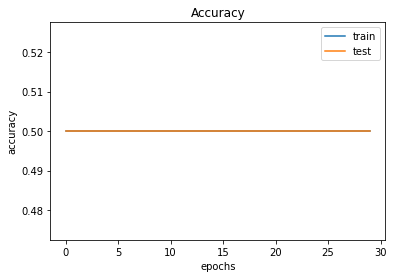

In [36]:
from matplotlib import pyplot as plt 

plt.plot(mh.history['accuracy'])
plt.plot(mh.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

In [37]:
test_loss, test_accuracy = model.evaluate(validation_set)

3/3 [==============================] - 0s 14ms/step - loss: -166295760.0000 - accuracy: 0.5000


In [38]:
test_loss

-166295760.0